[Back to Index](../index.html)

## Data Preprocessing: Normalization and Handling Outliers

### GIGO Principle (Garbage In, Garbage Out)
The quality of output is determined by the quality of the input. Poor-quality input will result in poor-quality output.

## Data variability and differences in scale

### Normalization
- **Problem Addressed:** 
  - Variation in the scales and ranges of data features.
  - Need to uniformly rescale features without distorting differences in value ranges.
- **Why It's a Problem:** 
  - Algorithms sensitive to input scale (e.g., distance-based or gradient-based) can be distorted by features on different scales.
  - Larger scale features can disproportionately influence the model, leading to bias.
- **Solution:** 
  - Rescale data to a [0, 1] range using $((x - \text{min}) / (\text{max} - \text{min}))$, where $(\text{min})$ and $(\text{max})$ are the minimum and maximum values of the feature.

### Standardization
- **Problem Addressed:** 
  - Features with different units of measurement.
  - Need to shift the distribution of attributes to have a mean of zero and a standard deviation of one.
- **Why It's a Problem:** 
  - Features on different scales can distort predictive modeling, leading to inaccurate results.
  - Standardization removes units, allowing different features to contribute equally.
- **Solution:** 
  - Transform data to have a mean of zero and a standard deviation of one using the Z-score formula $((x - \mu) / \sigma)$, where $(\mu)$ is the mean and $(\sigma)$ is the standard deviation.

Normalization and Standardization make data more uniform, suitable for various statistical and machine learning algorithms. The choice between them depends on the dataset and algorithm requirements: standardization is often preferred for data requiring Gaussian distribution, while normalization suits algorithms needing data bounded within a specific range.


## Missing Values
**Problem Addressed:**
- Incomplete datasets due to absence or unavailability of data points.
- Presence of NaN, blank, or null values in a dataset.

**Why It's a Problem:**
- Most algorithms cannot handle missing data effectively and may produce inaccurate results or fail to run altogether.
- Missing data can introduce bias or distort the results of the analysis.

**Handling Missing Values**
1. **Imputation:**
   - *Mean/Median/Mode Imputation:* Filling missing values with the mean, median, or mode of the column.
   - if the missing values are not randomly distributed, mean or median imputation could introduce bias.
   - *Example:* Replacing missing age values in a dataset with the median age.

2. **Deletion:** 
   - *Listwise Deletion:* Removing entire rows where any value is missing.
   - *Pairwise Deletion:* Utilizing available data while ignoring missing values during calculations.

## Categorical Data
**Problem Addressed:**
- Inability of most machine learning algorithms to directly process non-numeric or categorical data.
- Need to convert text labels into a numerical format.

**Why It's a Problem:**
- Algorithms generally require numerical inputs to perform calculations.
- Categorical data often represent important features that need to be included in the analysis.

**Encoding Categorical Data**
1. **One-Hot Encoding:** Creating a binary column for each category in a categorical variable.
   - *Example:* Converting a "Color" column with values "Red", "Blue", "Green" into three columns: "Color_Red", "Color_Blue", "Color_Green".

2. **Label Encoding:** Assigning a unique integer to each category.
   - *Example:* Converting "Small", "Medium", "Large" into 1, 2, 3.

    
## Absence of useful/meaningful/optimal features
**Problem Addressed:**
- Existence of raw data that may not be optimally represented for analysis.
- Need to enhance the predictive power of the data through creation, modification, or removal of features.

**Why It's a Problem:**
- Direct use of raw data may not reveal the underlying patterns needed for effective modeling.
- Certain relationships and characteristics might only become evident after transforming or combining features.

**Feature Engineering**
1. **Feature Creation:** Deriving new features from existing data.
   - *Example:* Creating a "BMI" feature from "Height" and "Weight" data.

2. **Feature Extraction:** Transforming high-dimensional data into a meaningful representation in fewer dimensions.
   - *Example:* Using PCA (Principal Component Analysis) to reduce the dimensions of a dataset.


## Complex Relationships in Data
**Problem Addressed:**
- Non-linear relationships between variables that linear models cannot capture.
- Skewed data distributions, different scales of measurement, or features that vary in range.

**Why It's a Problem:**
- Many algorithms assume normally distributed data or are sensitive to the scale of the features.
- Without proper transformation, models might be less accurate or misinterpret the relationships between variables.

**Data Transformation**
1. **Log Transformation:** Applying a logarithmic scale to transform skewed data.
   - *Example:* Using log transformation to reduce the skewness of income data.

2. **Power Transformation:** Applying transformations like square root, cube root, etc., to reduce skewness.
   - *Example:* Applying square root transformation to area measurements to reduce scale differences.

3. **Box-Cox Transformation:** A generalization of log transformation for positive data.
   - *Example:* Transforming positively skewed data to approximate normal distribution.


## Outliers

- **Definition**: Data points that are significantly different from other observations.
- **Risks**: Can skew analysis and lead to misleading conclusions.
    
**Problem Addressed:**
- Presence of extreme values or anomalies in the dataset.
- Data points that significantly deviate from the rest of the data.

**Why It's a Problem:**
- Outliers can skew statistical analyses and lead to misleading results.
- They can disproportionately influence the outcome of many algorithms, particularly those that rely on mean or variance.

**Handling Outlier**
1. **Trimming:** Removing outliers from the dataset.
   - *Example:* Deleting data points that fall beyond three standard deviations from the mean.

2. **Capping:** Limiting the extreme values to a threshold.
   - *Example:* Capping the maximum accepted value at the 95th percentile.

3. **Statistical Methods:** Using statistical tests to identify and handle outliers.
   - *Example:* Using Z-score to identify outliers.

These preprocessing techniques are vital in preparing data for effective analysis and modeling, ensuring that algorithms perform optimally and insights are reliable.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from scipy.stats import zscore, boxcox

data = {
    'Income': [20000, 35000, 25000, np.nan, 100000],
    'Age': [25, np.nan, 35, 40, 30],
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Size': ['Small', 'Medium', 'Large', 'Small', 'Medium'],
    'Height': [5.5, 6.0, 5.8, np.nan, 5.7],
    'Weight': [160, 180, 150, 165, 175]
}
df = pd.DataFrame(data)
df.head()

,Income,Age,Color,Size,Height,Weight
0,20000.0,25.0,Red,Small,5.5,160
1,35000.0,NaN,Blue,Medium,6.0,180
2,25000.0,35.0,Green,Large,5.8,150
3,NaN,40.0,Blue,Small,NaN,165
4,100000.0,30.0,Red,Medium,5.7,175


In [47]:
df.isna().sum()

Income    1
Age       1
Color     0
Size      0
Height    1
Weight    0
dtype: int64

In [48]:
# Handling Missing Values
# Imputation
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

In [49]:
df['Income'].fillna(df['Income'].mean(), inplace=True)
df['Height'].fillna(df['Height'].median(), inplace=True)

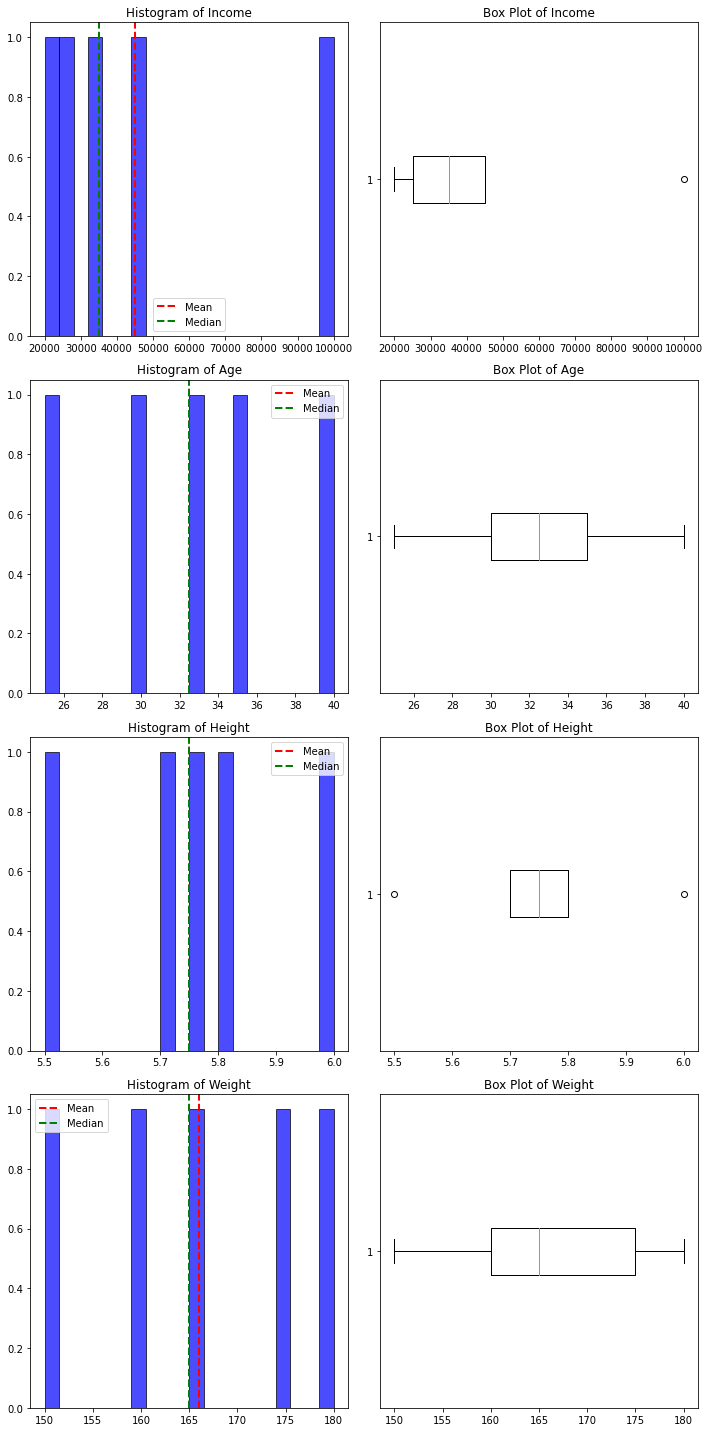

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()


fig, axs = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(10, 5 * len(numeric_columns)))


for i, col in enumerate(numeric_columns):
    # Histogram with mean and median
    axs[i, 0].hist(df[col].dropna(), bins=20, alpha=0.7, color='blue', edgecolor='black')
    axs[i, 0].axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2)
    axs[i, 0].axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2)
    axs[i, 0].legend(['Mean', 'Median'])
    axs[i, 0].set_title(f'Histogram of {col}')
    
    # Box plot
    axs[i, 1].boxplot(df[col].dropna(), vert=False)
    axs[i, 1].set_title(f'Box Plot of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


* Income: `Mean > Median` One extreme outlier at the right tail
* Age, Height: `Mean ~ Median` 
* Weight: `Mean > Median` (slightly greater)

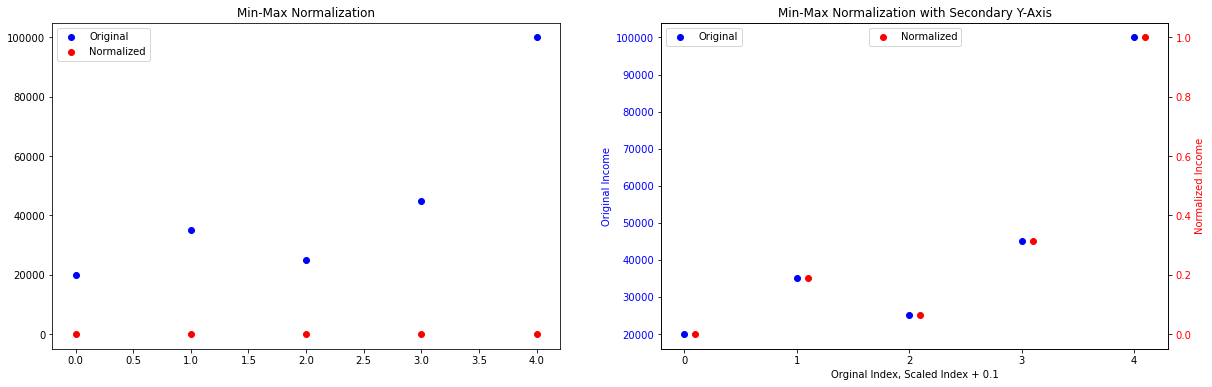

In [51]:
# Normalization and Standardization
# Min-Max Normalization
scaler = MinMaxScaler()
df['Income_normalized'] = scaler.fit_transform(df[['Income']])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.scatter(df.index, df['Income'], color='blue', label='Original')
ax1.scatter(df.index, df['Income_normalized'], color='red', label='Normalized')
ax1.set_title('Min-Max Normalization')
ax1.legend()

ax3 = ax2.twinx()

# Plot the original Income values
ax2.scatter(df.index, df['Income'].fillna(0), color='blue', label='Original')  # Handling missing values temporarily
ax2.set_ylabel('Original Income', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


# Plot the normalized Income values
ax3.scatter(df.index + 0.1, df['Income_normalized'], color='red', label='Normalized')
ax3.set_ylabel('Normalized Income', color='red')
ax3.tick_params(axis='y', labelcolor='red')

# Title and legend
ax2.set_title('Min-Max Normalization with Secondary Y-Axis')
ax2.legend(loc='upper left')
ax3.legend(loc='upper center')
ax2.set_xlabel('Orginal Index, Scaled Index + 0.1')

# Show the plot
plt.show()

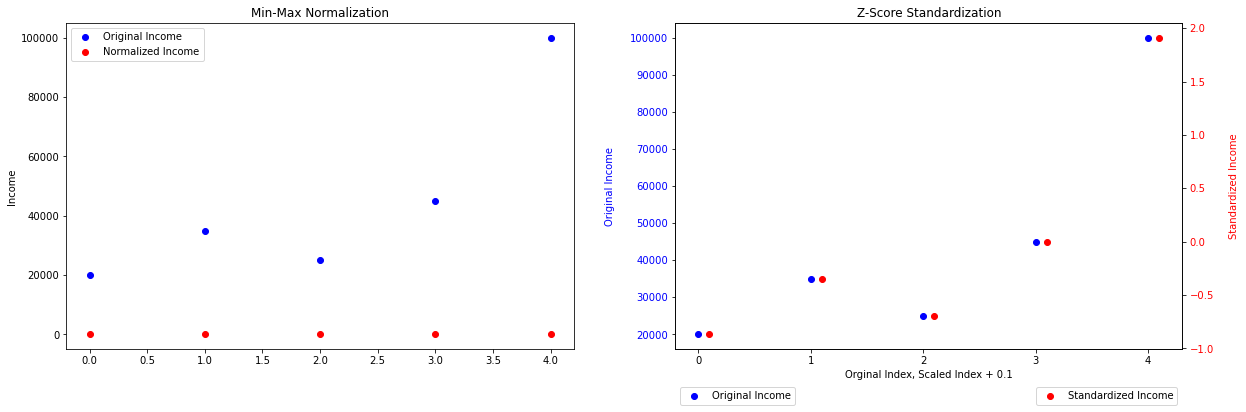

In [52]:

# Z-Score Standardization
scaler = StandardScaler()
df['Income_standardized'] = scaler.fit_transform(df[['Income']])
# Apply Min-Max Normalization and Z-Score Standardization
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()
df['Income_normalized'] = scaler_minmax.fit_transform(df[['Income']].fillna(0))  # Handling missing values temporarily
df['Income_standardized'] = scaler_standard.fit_transform(df[['Income']].fillna(0))  # Handling missing values temporarily

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot for Min-Max Normalization
ax1.scatter(df.index, df['Income'].fillna(0), color='blue', label='Original Income')  # Handling missing values temporarily
ax1.scatter(df.index, df['Income_normalized'], color='red', label='Normalized Income')
ax1.set_title('Min-Max Normalization')
ax1.set_ylabel('Income')
ax1.legend()

# Plot for Z-Score Standardization
ax3 = ax2.twinx()
ax2.scatter(df.index, df['Income'].fillna(0), color='blue', label='Original Income')  # Handling missing values temporarily
ax3.scatter(df.index + 0.1, df['Income_standardized'], color='red', label='Standardized Income')
ax2.set_title('Z-Score Standardization')
ax2.set_ylabel('Original Income', color='blue')
ax3.set_ylabel('Standardized Income', color='red')
ax2.tick_params(axis='y', labelcolor='blue')
ax3.tick_params(axis='y', labelcolor='red')

# Adjust legend position
ax2.legend(loc='upper left', bbox_to_anchor=(0, -0.1))
ax3.legend(loc='upper right', bbox_to_anchor=(1, -0.1))

# Adjust label position
ax2.yaxis.labelpad = 15
ax3.yaxis.labelpad = 15
ax2.set_xlabel('Orginal Index, Scaled Index + 0.1')
# Show the plot
plt.show()

In [53]:
# Encoding Categorical Data
# One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
encoded_colors = encoder.fit_transform(df[['Color']])
color_encoded_df = pd.DataFrame(encoded_colors, columns=encoder.get_feature_names_out(['Color']))
df = df.join(color_encoded_df).drop('Color', axis=1)

In [54]:
df

,Income,Age,Size,Height,Weight,Income_normalized,Income_standardized,Color_Blue,Color_Green,Color_Red
0,20000.0,25.0,Small,5.50,160,0.0000,-0.867763,0.0,0.0,1.0
1,35000.0,32.5,Medium,6.00,180,0.1875,-0.347105,1.0,0.0,0.0
2,25000.0,35.0,Large,5.80,150,0.0625,-0.694210,0.0,1.0,0.0
3,45000.0,40.0,Small,5.75,165,0.3125,0.000000,1.0,0.0,0.0
4,100000.0,30.0,Medium,5.70,175,1.0000,1.909078,0.0,0.0,1.0


In [55]:
# Label Encoding
encoder = LabelEncoder()
df['Size_encoded'] = encoder.fit_transform(df['Size'])
df

,Income,Age,Size,Height,Weight,Income_normalized,Income_standardized,Color_Blue,Color_Green,Color_Red,Size_encoded
0,20000.0,25.0,Small,5.50,160,0.0000,-0.867763,0.0,0.0,1.0,2
1,35000.0,32.5,Medium,6.00,180,0.1875,-0.347105,1.0,0.0,0.0,1
2,25000.0,35.0,Large,5.80,150,0.0625,-0.694210,0.0,1.0,0.0,0
3,45000.0,40.0,Small,5.75,165,0.3125,0.000000,1.0,0.0,0.0,2
4,100000.0,30.0,Medium,5.70,175,1.0000,1.909078,0.0,0.0,1.0,1


In [56]:

# Feature Engineering
# Feature Creation
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

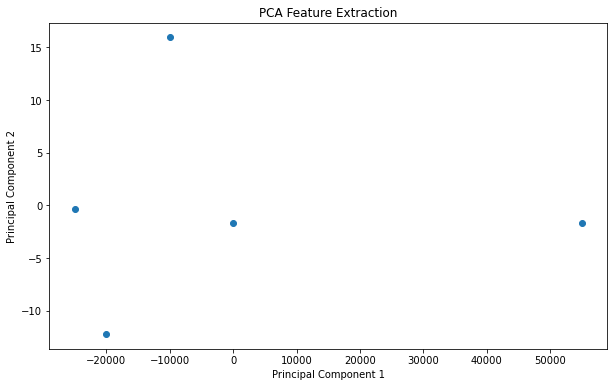

In [57]:
# Feature Extraction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['Income', 'Age', 'Height', 'Weight']])
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.title('PCA Feature Extraction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

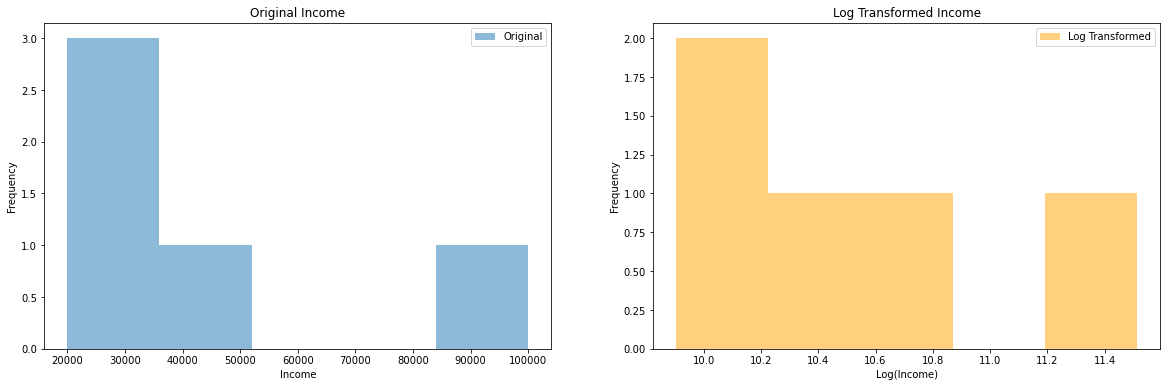

In [63]:
df['Income_log'] = np.log(df['Income'].dropna())

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot the original Income values on the first subplot
axs[0].hist(df['Income'].dropna(), bins=5, alpha=0.5, label='Original')
axs[0].set_title('Original Income')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Plot the Log Transformed Income values on the second subplot
axs[1].hist(df['Income_log'], bins=5, alpha=0.5, label='Log Transformed', color='orange')
axs[1].set_title('Log Transformed Income')
axs[1].set_xlabel('Log(Income)')
axs[1].set_ylabel('Frequency')
axs[1].legend()

# Show the plot
plt.show()

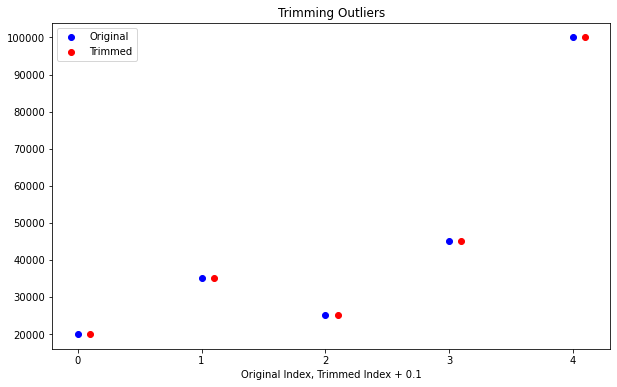

In [71]:
# Outlier Treatment
# Trimming
df_trimmed = df[(np.abs(zscore(df['Income'].dropna())) < 3)]
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Income'], color='blue', label='Original')
plt.scatter(df_trimmed.index + 0.1, df_trimmed['Income'], color='red', label='Trimmed')
plt.title('Trimming Outliers')
plt.xlabel('Original Index, Trimmed Index + 0.1')
plt.legend()
plt.show()


### Modified Z-Score
- **Definition**: A more robust measure of standard deviation that uses the median and median absolute deviation (MAD).
- **Formula**: 
  $$ \text{M-Z} = \frac{0.6745 \times (X_i - \tilde{X})}{MAD} $$
  
 
### Non-Parametric Solutions to Outliers
- **Approach**: Uses ranks or medians instead of means, which are less affected by extreme values.

### Nonlinear Data Transformation
- **Purpose**: To transform nonlinear relationships into linear ones, often using logarithms, to apply linear regression methods.


## Non-linear Transformation

### What is Non-linear Transformation?
A `non-linear transformation` involves applying a function to data points that changes their distribution in a non-linear manner. This is different from linear transformations, which involve operations like scaling or rotating that preserve linear relationships.

### What is the Use of Non-linear Transformation?
- **Normalizing Data Distribution**: Used to transform skewed data into a more Gaussian (normal) distribution, aiding in meeting the assumptions of many statistical tests and models.
- **Enhancing Model Performance**: By transforming features, non-linear transformations can help in revealing hidden patterns that improve the performance of machine learning models.
- **Mitigating Effects of Outliers**: They can reduce the impact of outliers by compressing the scale of extreme values.

### What are the Limitations?
- **Complex Interpretation**: It can make the interpretation of results more complex.
- **Distortion of Original Relationships**: Can potentially distort the natural relationships in the data.
- **Overfitting Risk**: In machine learning, overfitting can occur if the transformation overly complicates the model.

### Real World Applications
- **Data Normalization**: In preprocessing, to normalize data before analysis or model training.
- **Financial Modeling**: For stabilizing the variance of financial time series data.
- **Bioinformatics**: In analyzing gene expression data where distributions can be highly skewed.

### Interesting Questions
1. How do non-linear transformations affect the distribution of data?
2. When should a non-linear transformation be applied to a dataset?
3. Give an example of a non-linear transformation used in data preprocessing?
4. How do non-linear transformations help in dealing with outliers?

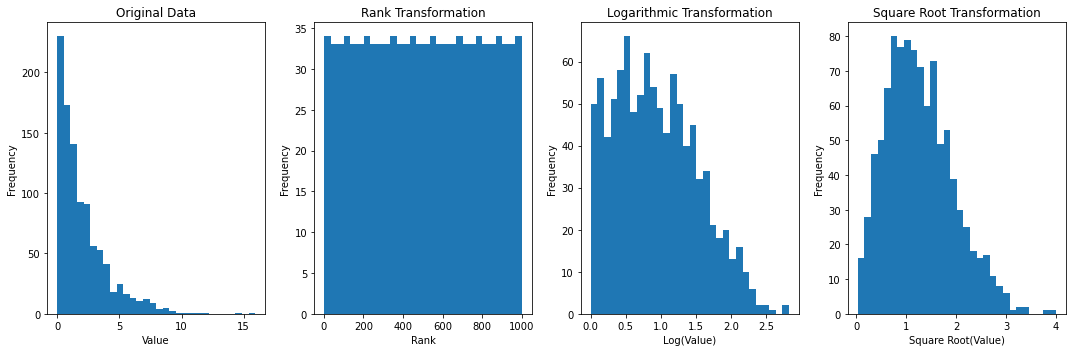

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata

# Generate example data
data = np.random.exponential(scale=2, size=1000)

# Rank Transformation
rank_transformed = rankdata(data)

# Logarithmic Transformation (adding 1 to avoid log(0))
log_transformed = np.log(data + 1)

# Square Root Transformation
sqrt_transformed = np.sqrt(data)

# Plotting the transformations
plt.figure(figsize=(15, 5))

# Original Data
plt.subplot(1, 4, 1)
plt.hist(data, bins=30)
plt.title('Original Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Rank Transformation
plt.subplot(1, 4, 2)
plt.hist(rank_transformed, bins=30)
plt.title('Rank Transformation')
plt.xlabel('Rank')
plt.ylabel('Frequency')

# Logarithmic Transformation
plt.subplot(1, 4, 3)
plt.hist(log_transformed, bins=30)
plt.title('Logarithmic Transformation')
plt.xlabel('Log(Value)')
plt.ylabel('Frequency')

# Square Root Transformation
plt.subplot(1, 4, 4)
plt.hist(sqrt_transformed, bins=30)
plt.title('Square Root Transformation')
plt.xlabel('Square Root(Value)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
